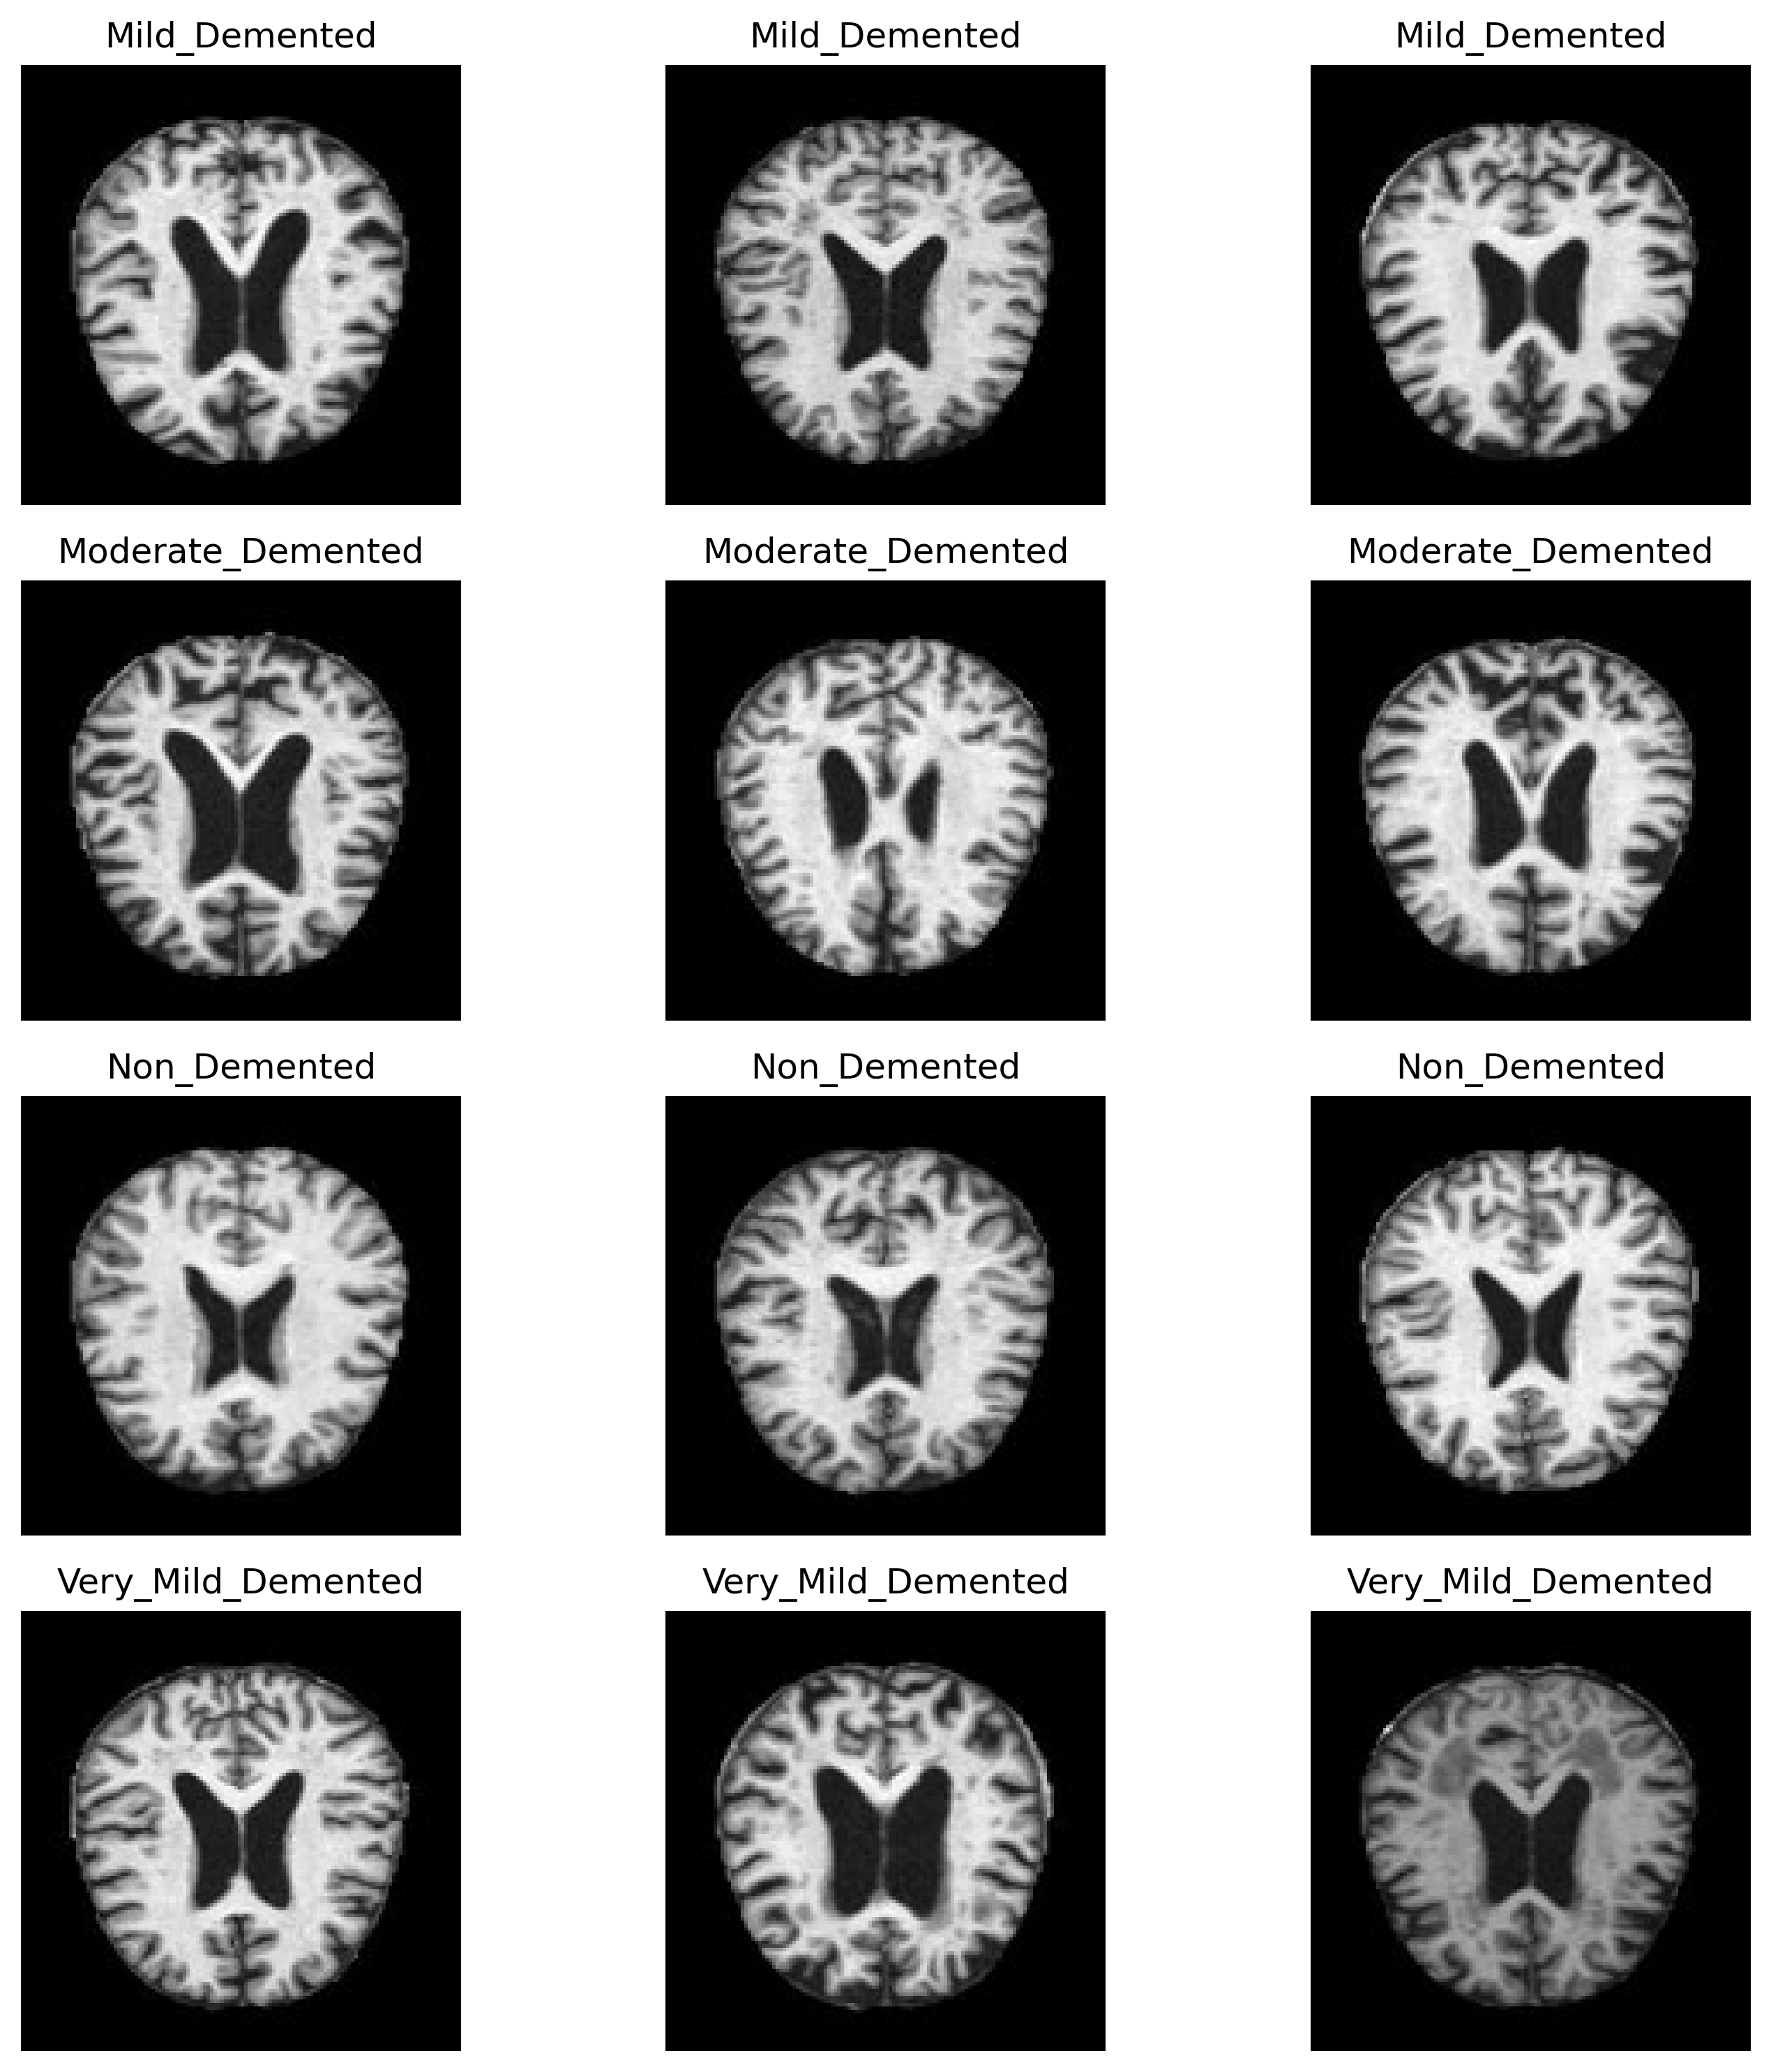

Number of images in each class:
Mild_Demented: 896
Moderate_Demented: 64
Non_Demented: 3200
Very_Mild_Demented: 2240


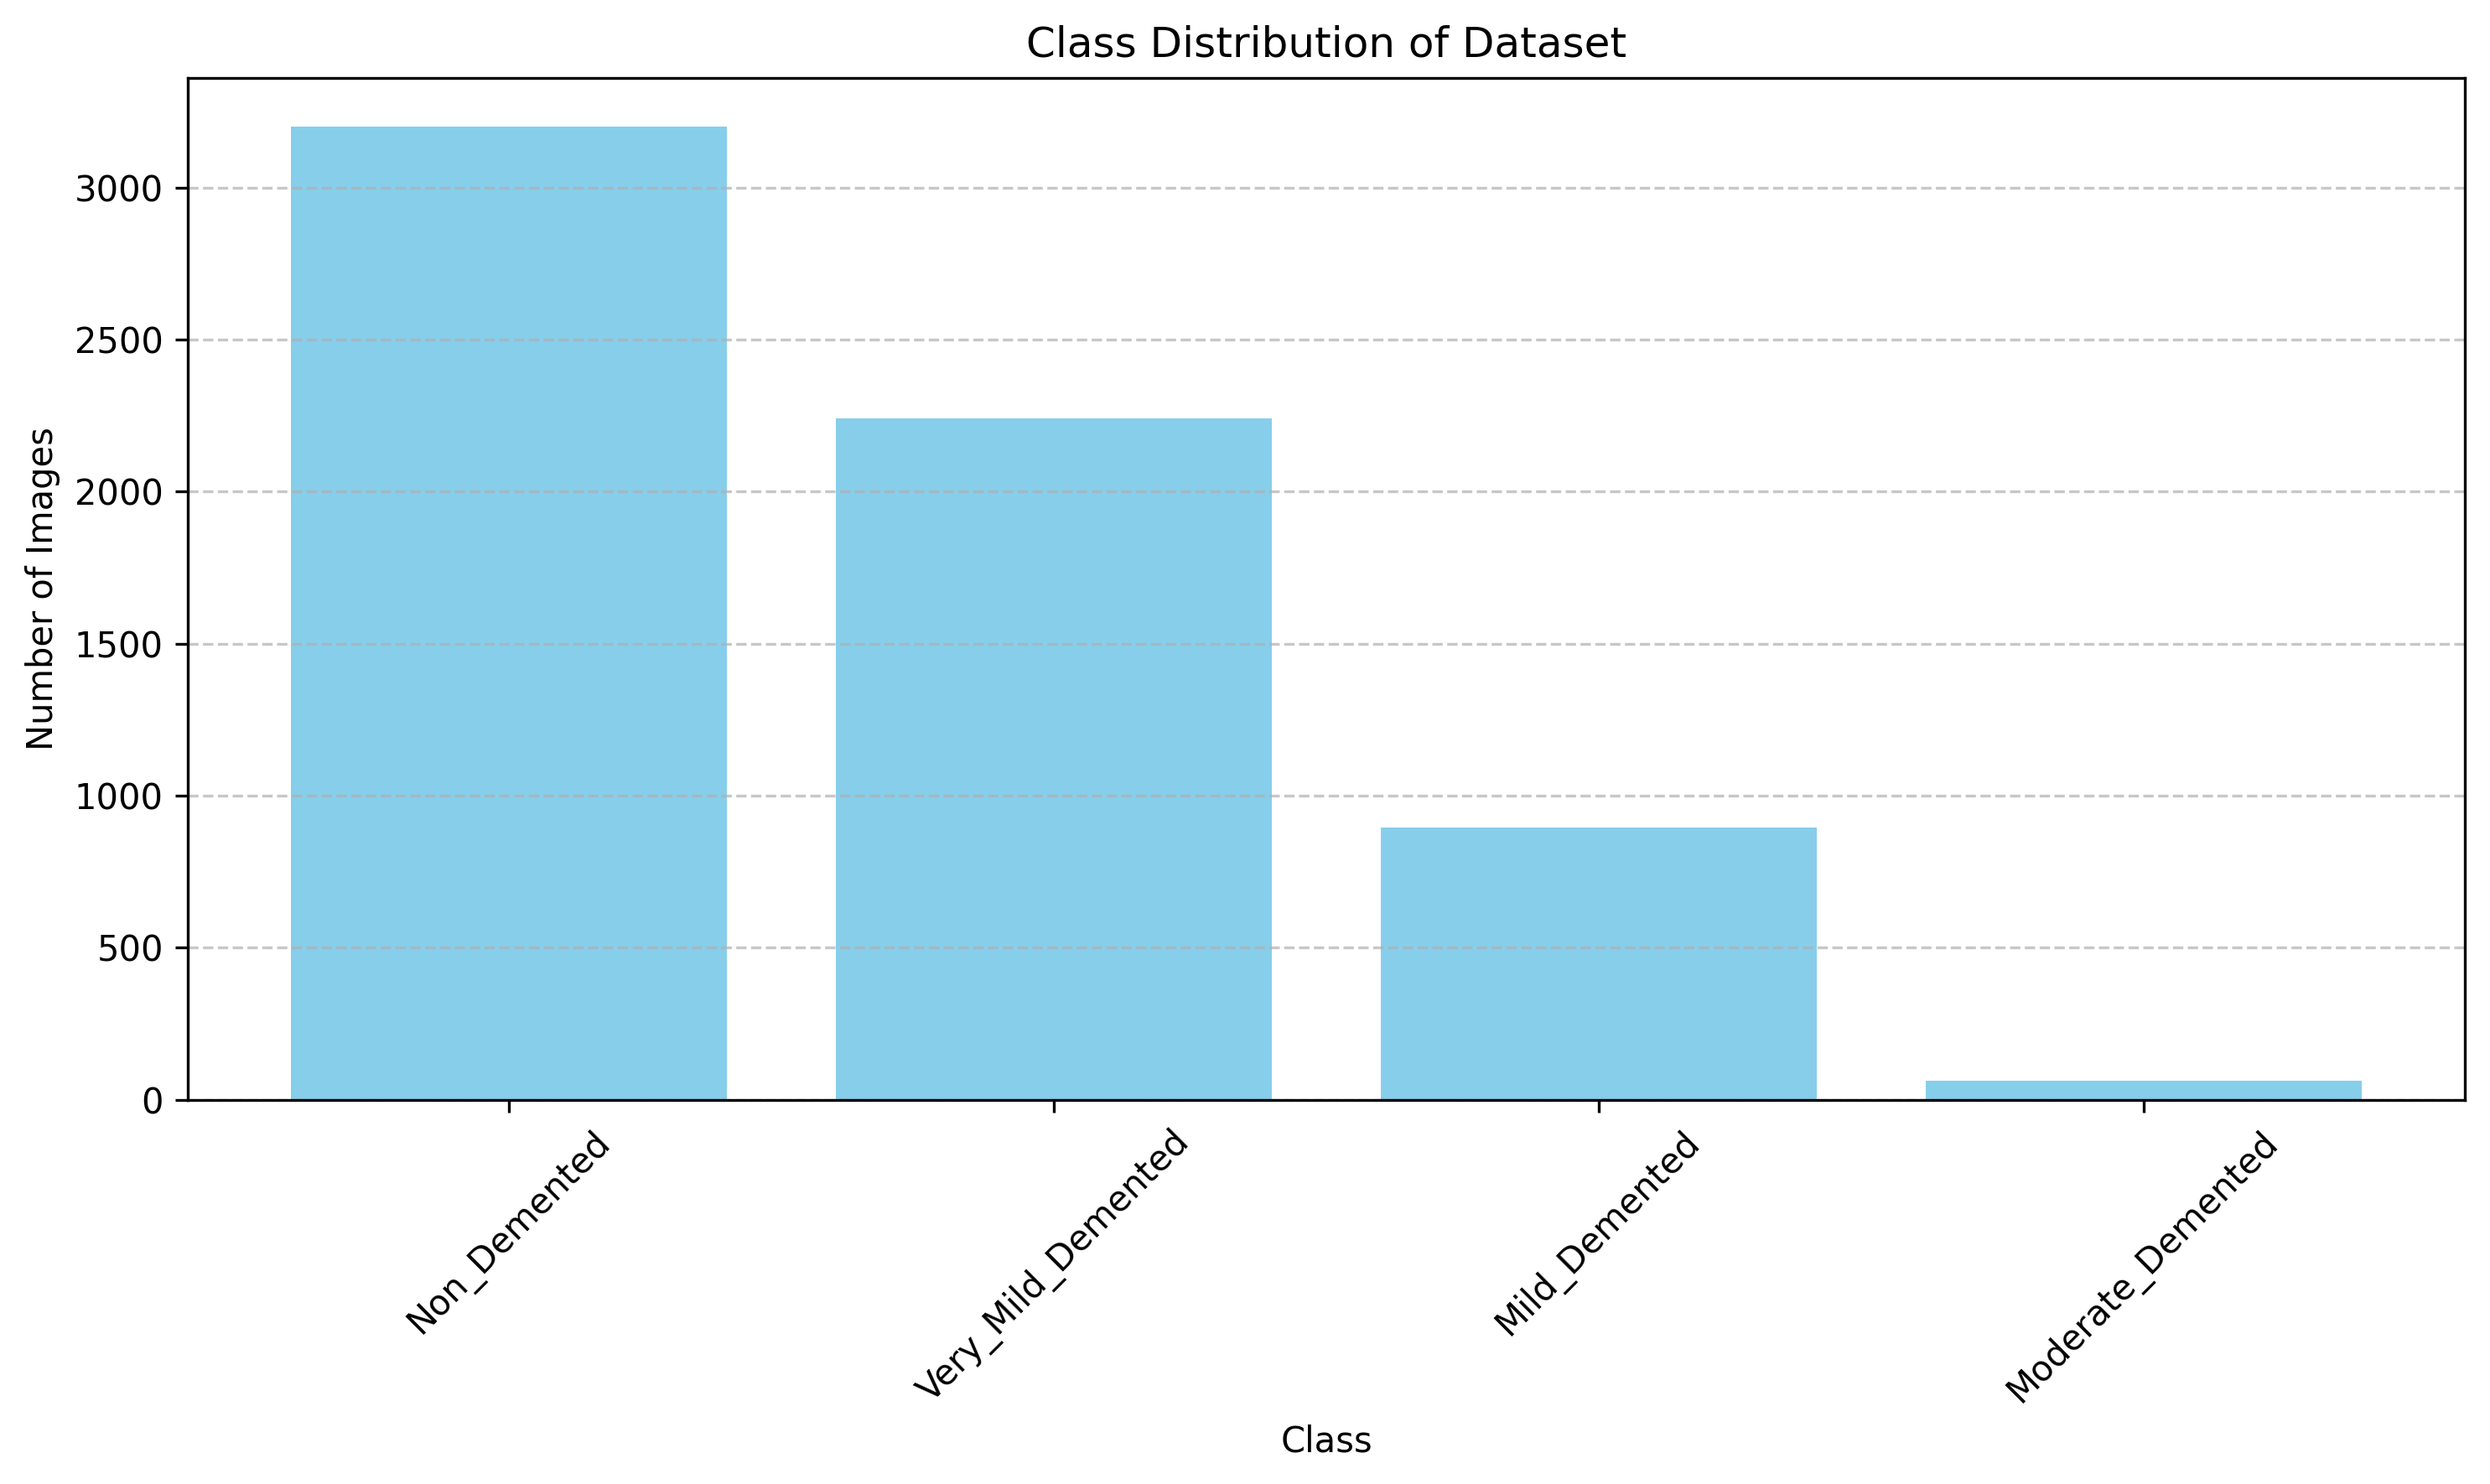

In [22]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the directory containing the original dataset
original_dataset_dir = 'archive/Dataset'

# Define the class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Initialize a dictionary to store the count of images in each class
class_counts = {}

# Initialize a subplot grid for displaying images
fig, axes = plt.subplots(len(class_names), 3, figsize=(10, 10))

# Iterate through each class directory
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(original_dataset_dir, class_name)
    filenames = [fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')]
    
    # Display the number of images in the current class
    class_counts[class_name] = len(filenames)
    
    # Randomly select three images from the current class
    sample_filenames = filenames[:3]
    
    # Display the images
    for j, filename in enumerate(sample_filenames):
        img_path = os.path.join(class_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        
        # Plot the image
        axes[i, j].imshow(img)
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the number of images in each class
print("Number of images in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


import matplotlib.pyplot as plt

# Define the class names and their respective counts
class_names = ['Non_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Moderate_Demented']
class_counts = [3200, 2240, 896, 64]  # Update with the actual counts

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.title('Class Distribution of Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)  # Rotate class labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


A search has been initiated within the folder named 'Dataset'.
There are 896 images in the Mild_Demented folder.
There are 64 images in the Moderate_Demented folder.
There are 3200 images in the Non_Demented folder.
There are 2240 images in the Very_Mild_Demented folder.
There are 1 images in the .ipynb_checkpoints folder.
The search has been completed.


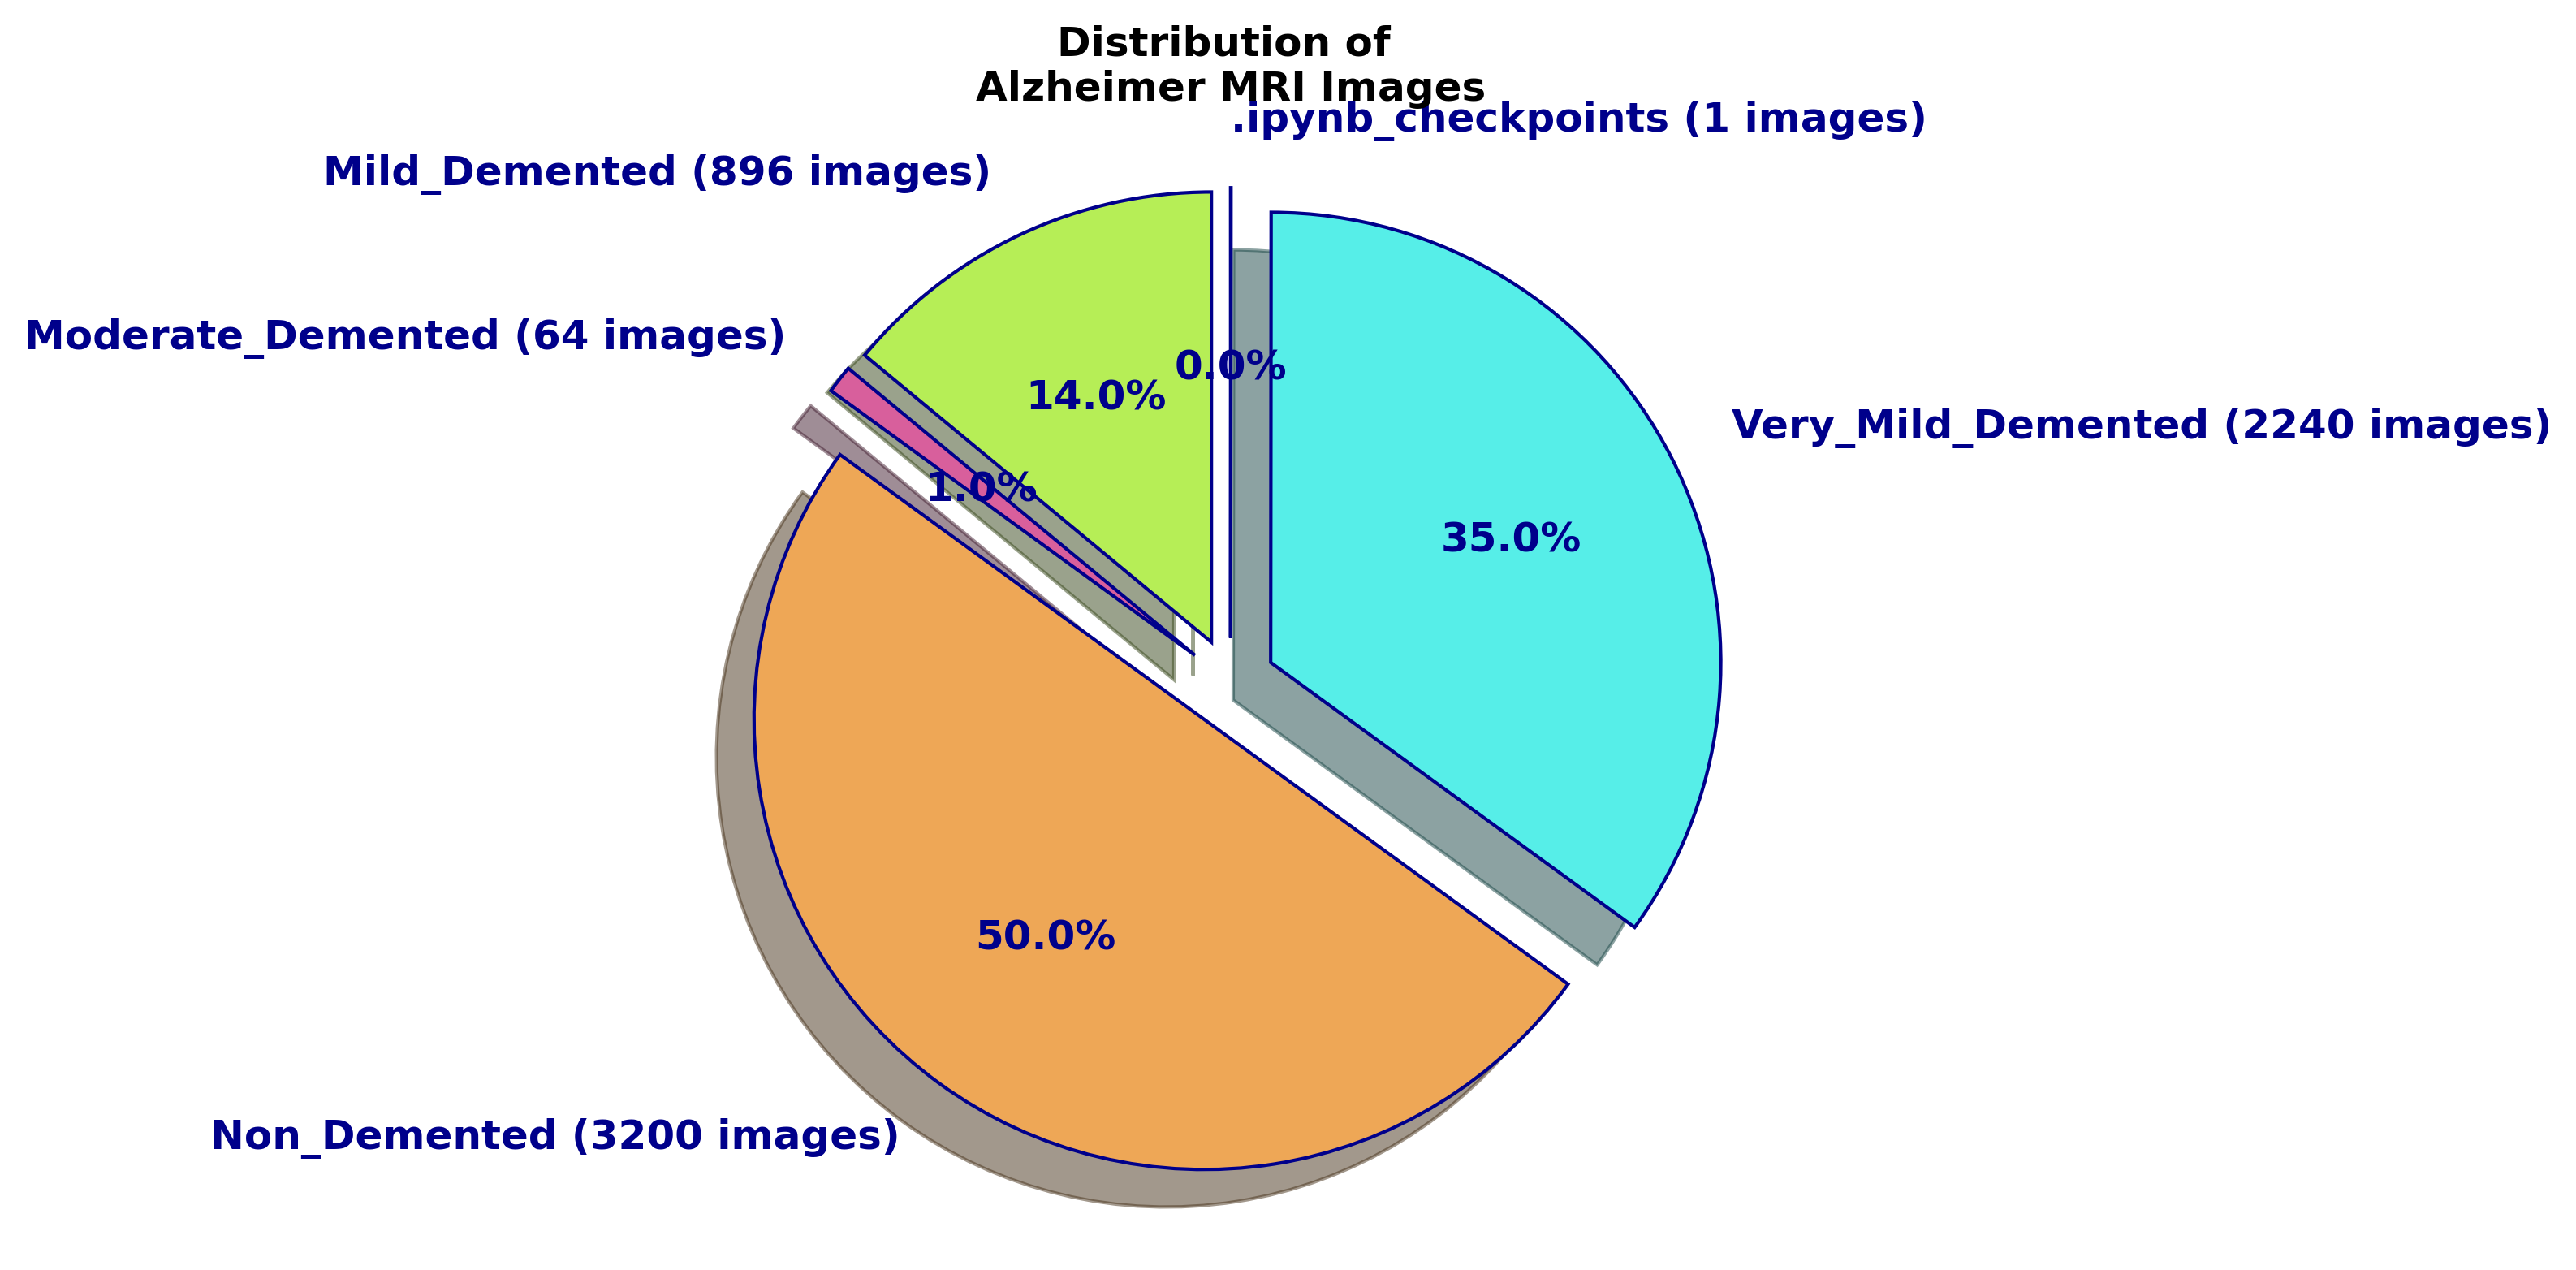

In [23]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
colors = ["#B6EE56", "#D85F9C", "#EEA756", "#56EEE8"]

class_dist = {}
def image_counter(folder_path):
    basename = os.path.basename(folder_path)
    print('\033[92m'+f"A search has been initiated within the folder named '{basename}'."+'\033[0m')
    image_extensions = ['.jpg', '.jpeg', '.png']

    for root, dirs, _ in os.walk(folder_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            count = 0

            for filename in os.listdir(dir_path):
                file_ext = os.path.splitext(filename)[1].lower()

                if file_ext in image_extensions:
                    count += 1
            
            class_dist[dir_name] = count
            print(f"There are \033[35m{count}\033[0m images in the {dir_name} folder.")
    print('\033[92m'+"The search has been completed."+'\033[0m')
    
    keys = list(class_dist.keys())
    values = list(class_dist.values())
    explode = (0.1,)*len(keys)
    
    labels = [f'{key} ({value} images)' for key, value in zip(keys, values)]
    
    plt.pie(values, explode=explode,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors, textprops={'fontsize': 12, "fontweight" : "bold", "color":"darkblue"},  wedgeprops=
           {'edgecolor':'darkblue'} , labeldistance=1.15)
    plt.title("Distribution of \nAlzheimer MRI Images", size=12, fontweight="bold")

image_counter(original_dataset_dir)

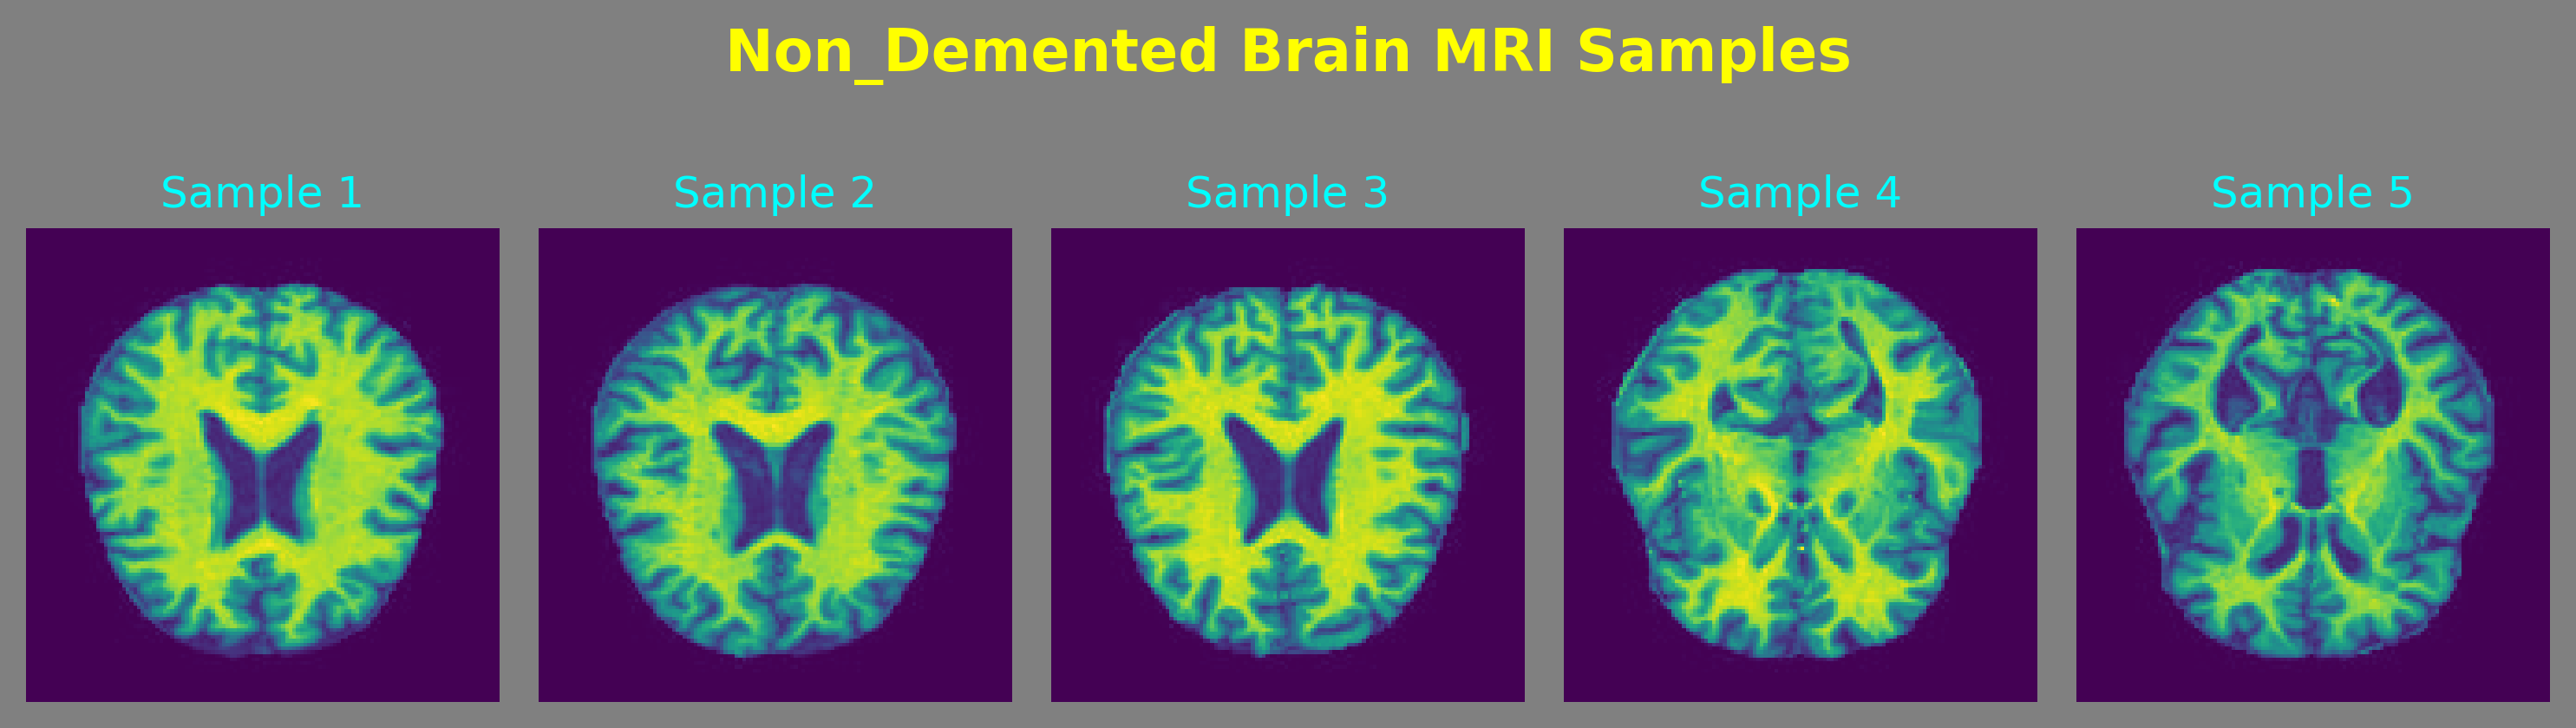

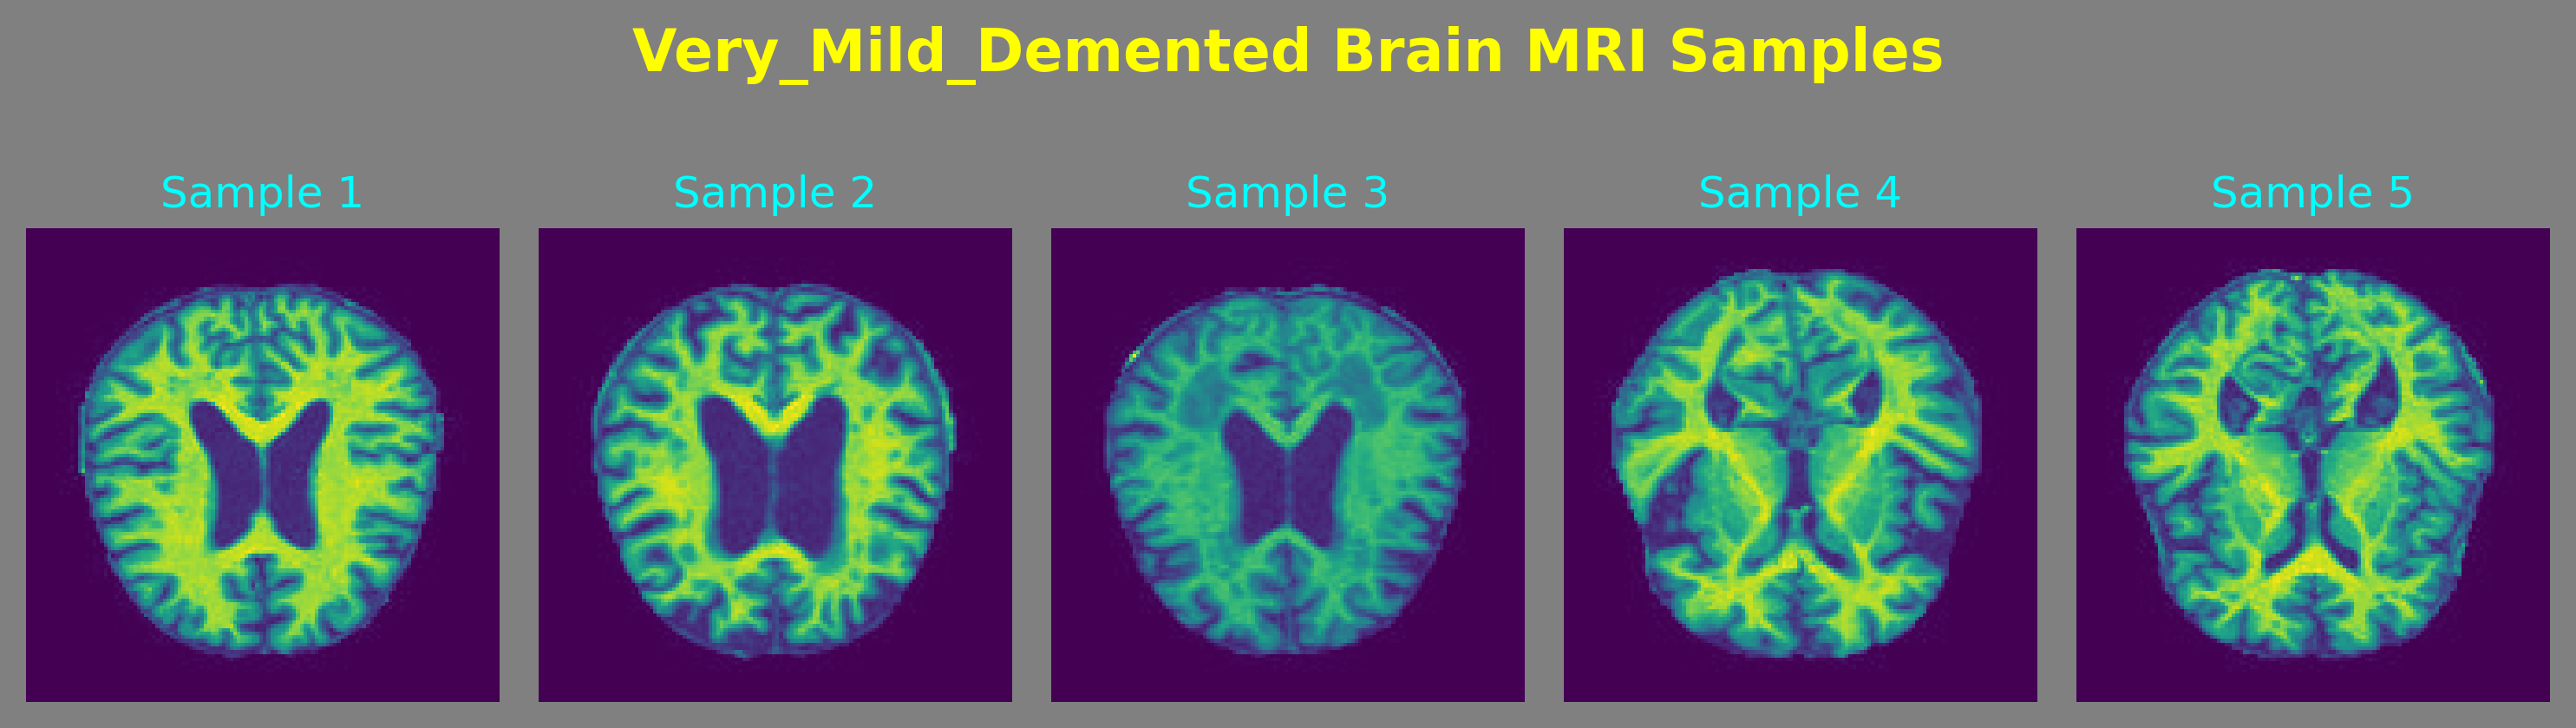

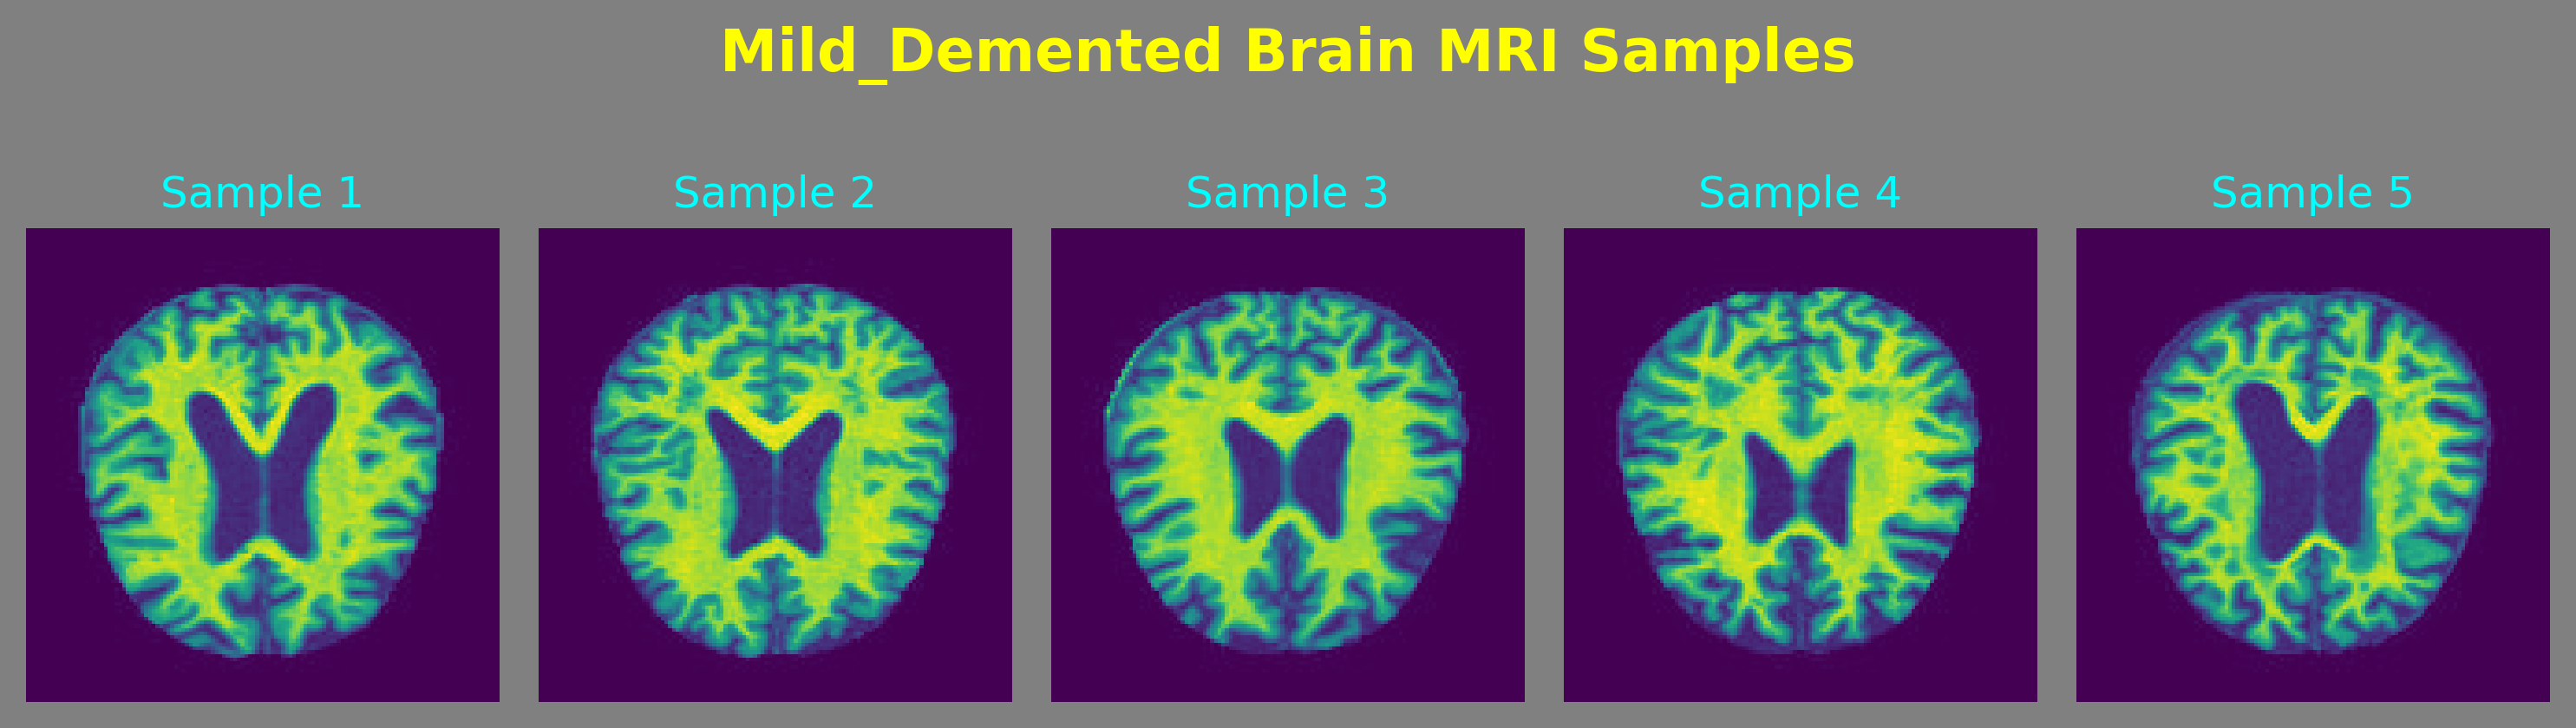

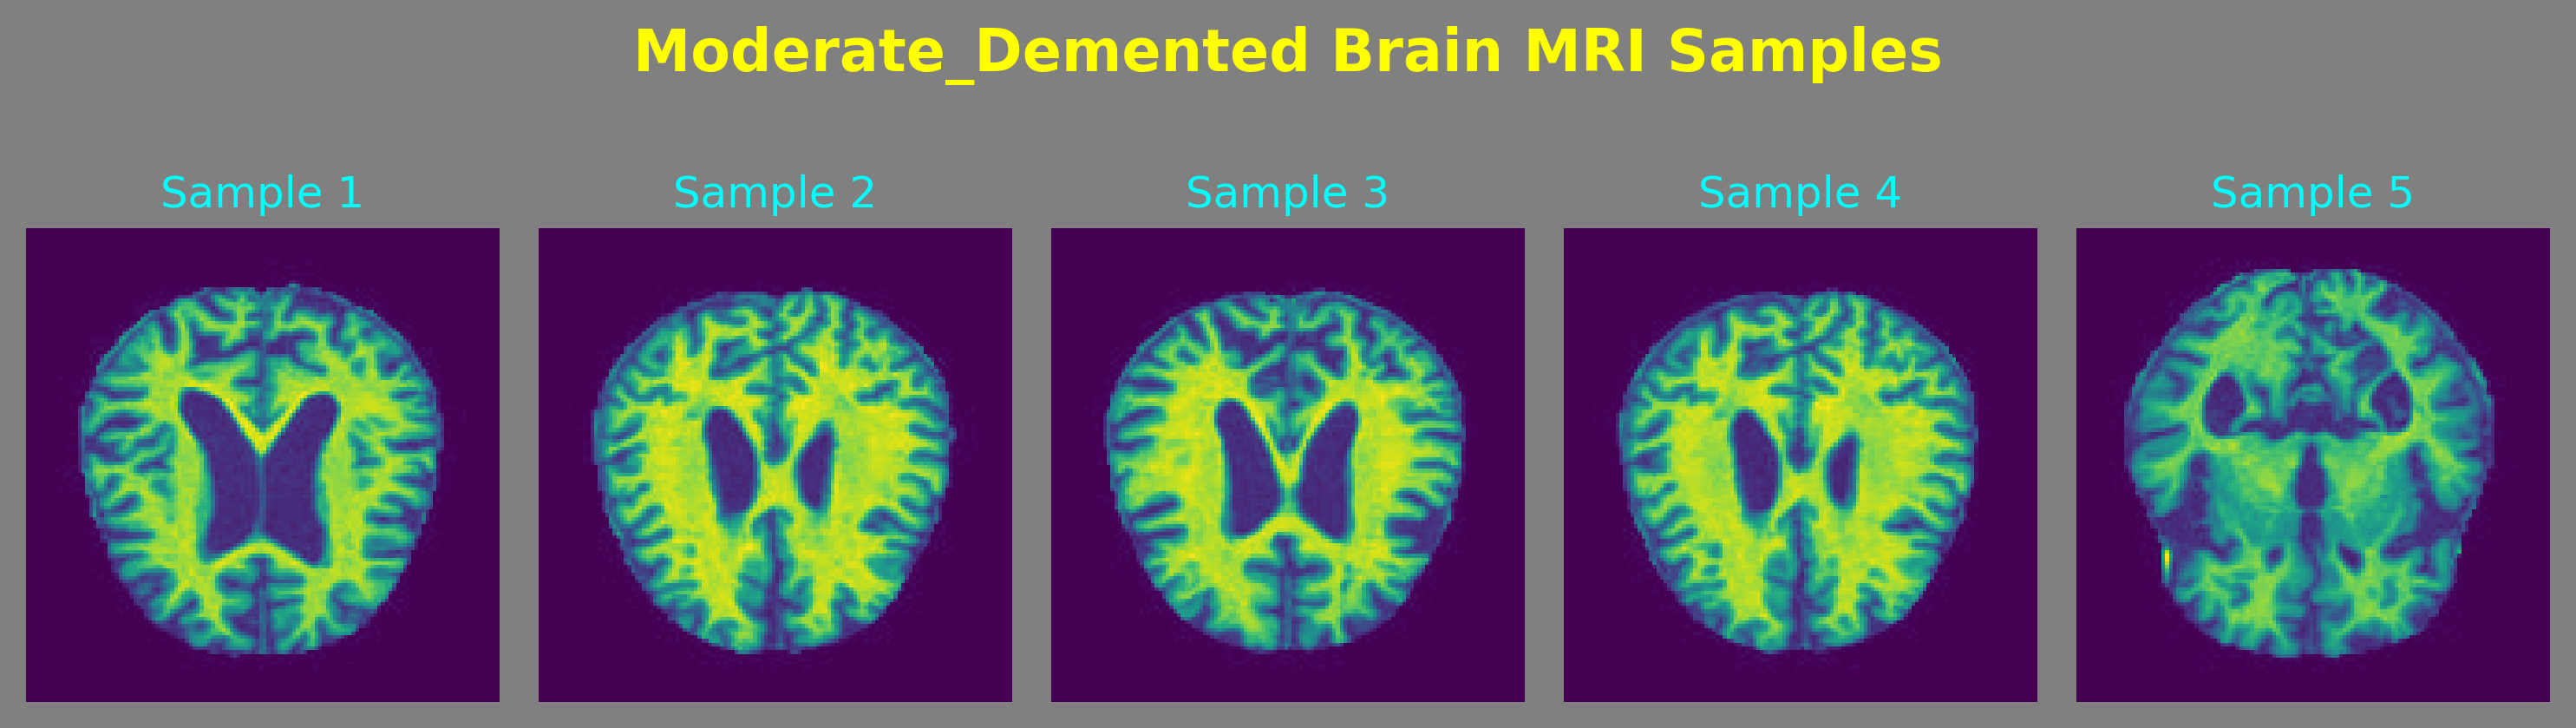

In [24]:
import matplotlib.image as mpimg
def sample_bringer(path, target, num_samples=5):
    
    class_path = os.path.join(path, target)

    image_files = [image for image in os.listdir(class_path) if image.endswith('.jpg')]

    fig, ax = plt.subplots(1, num_samples, facecolor="gray")
    fig.suptitle(f'{target} Brain MRI Samples', color="yellow",fontsize=16, fontweight='bold', y=0.75)
    
    for i in range(num_samples):
        image_path = os.path.join(class_path, image_files[i])
        img = mpimg.imread(image_path)

        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(f'Sample {i+1}', color="aqua")

    plt.tight_layout()
    
for target in class_names:
    sample_bringer(original_dataset_dir, target=target)

In [25]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory(original_dataset_dir,
                                                batch_size = 64,
                                                image_size=(150, 150),
                                                shuffle=True,
                                                seed=42,)

class_names = data.class_names

Found 6401 files belonging to 4 classes.


In [26]:
alz_dict = {index: img for index, img in enumerate(data.class_names)}

class Process:
    def __init__(self, data):
        self.data = data.map(lambda x, y: (x/255, y))

    def create_new_batch(self):
        self.batch = self.data.as_numpy_iterator().next()
        text = "Min and max pixel values in the batch ->"
        print(text, self.batch[0].min(), "&", self.batch[0].max())
        
    def show_batch_images(self, number_of_images=5):
        fig, ax = plt.subplots(ncols=number_of_images, figsize=(20,20), facecolor="gray")
        fig.suptitle("Brain MRI (Alzheimer) Samples in the Batch", color="yellow",fontsize=18, fontweight='bold', y=0.6)
        for idx, img in enumerate(self.batch[0][:number_of_images]):
            ax[idx].imshow(img)
            class_no = self.batch[1][idx]
            ax[idx].set_title(alz_dict[class_no], color="aqua")
            ax[idx].set_xticklabels([])
            ax[idx].set_yticklabels([])
    
    def train_test_val_split(self, train_size, val_size, test_size):

        train = int(len(self.data)*train_size)
        test = int(len(self.data)*test_size)
        val = int(len(self.data)*val_size)
        
        train_data = self.data.take(train)
        val_data = self.data.skip(train).take(val)
        test_data = self.data.skip(train+val).take(test)

        return train_data, val_data, test_data

Min and max pixel values in the batch -> 0.0 & 0.9946027


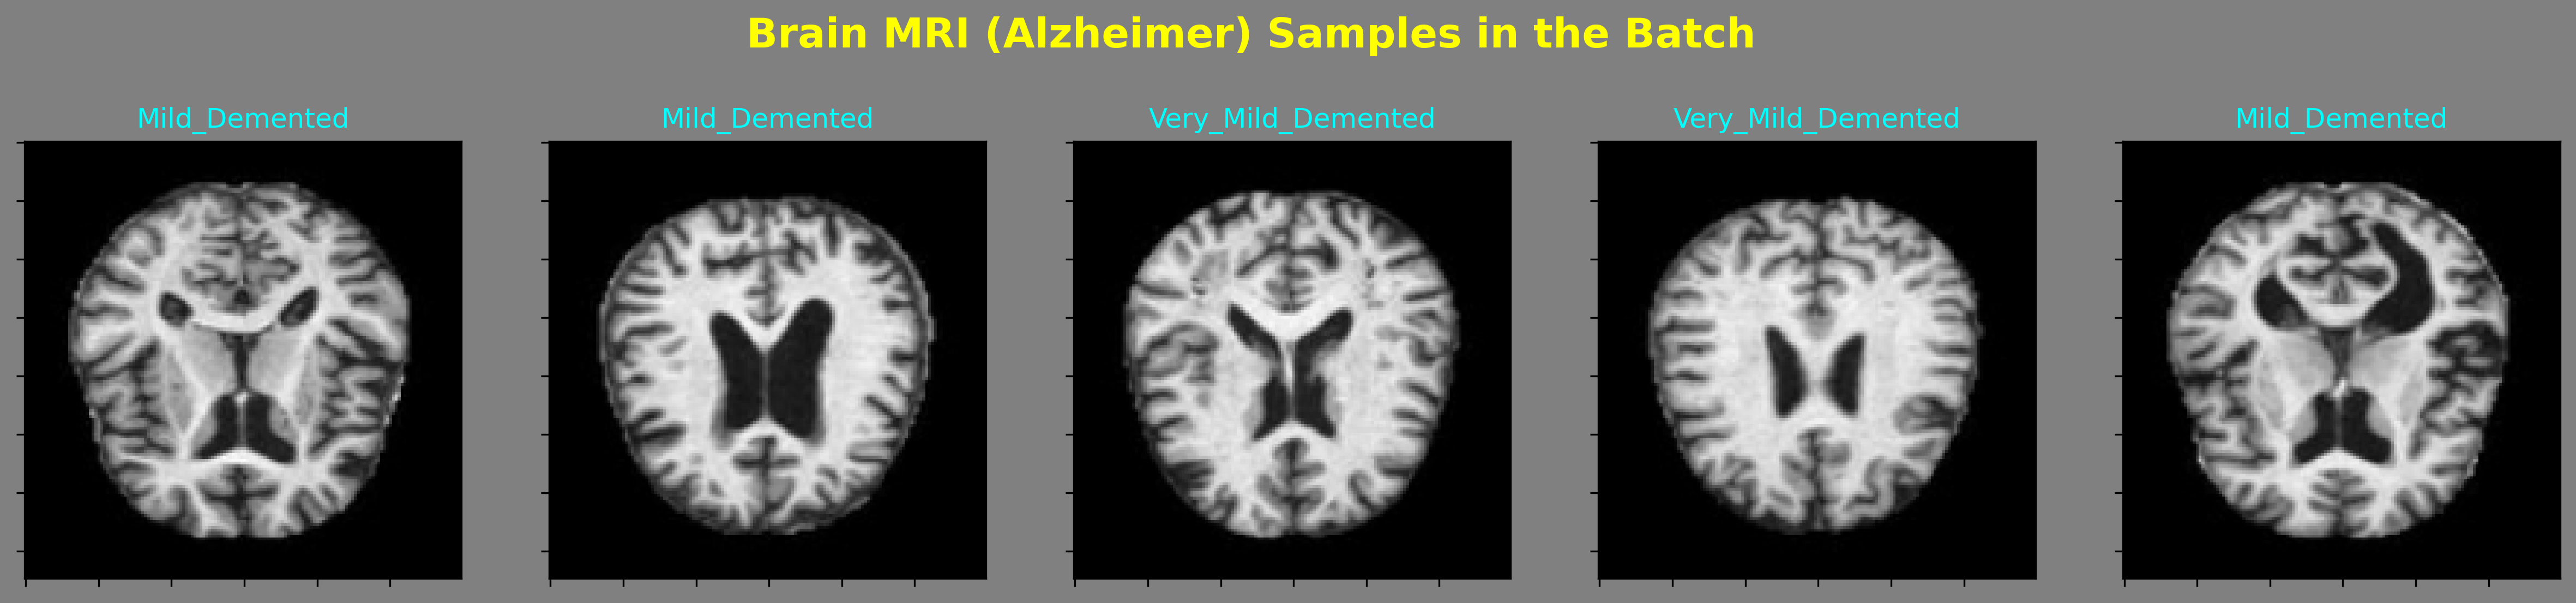

In [27]:
process = Process(data)
process.create_new_batch()
process.show_batch_images(number_of_images=5)

In [28]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

# Define directories
input_data_dir = 'archive/Dataset'  # Folder containing mild_dementia and moderate_dementia folders
output_data_dir = 'augmented_data'  # Folder where augmented data will be saved

# Create output directory if not exist
os.makedirs(output_data_dir, exist_ok=True)

# Data augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=[0.98, 1.02],
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='constant',
    data_format='channels_last',
    rotation_range=10,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Function to apply data augmentation
def augment_images(input_dir, output_dir, target_count):
    images = [file for file in os.listdir(input_dir) if not file.startswith('.')]
    num_images = len(images)
    num_augmentations = target_count // num_images + 1
    
    for img_name in images:
        img = Image.open(os.path.join(input_dir, img_name))
        
        # Convert grayscale images to RGB if they have only one channel
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        img = np.array(img)
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        
        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= num_augmentations:
                break

# Augment Mild Dementia images
mild_dementia_input_dir = os.path.join(input_data_dir, 'Mild_Demented')
mild_dementia_output_dir = os.path.join(output_data_dir, 'Mild_Demented_augmented')
os.makedirs(mild_dementia_output_dir, exist_ok=True)
augment_images(mild_dementia_input_dir, mild_dementia_output_dir, 2680)

# Augment Moderate Dementia images
moderate_dementia_input_dir = os.path.join(input_data_dir, 'Moderate_Demented')
moderate_dementia_output_dir = os.path.join(output_data_dir, 'Moderate_Demented_augmented')
os.makedirs(moderate_dementia_output_dir, exist_ok=True)
augment_images(moderate_dementia_input_dir, moderate_dementia_output_dir, 2552)


A search has been initiated within the folder named 'augmented_data'.
There are 4195 images in the Mild_Demented_augmented folder.
There are 3988 images in the Moderate_Demented_augmented folder.
There are 3200 images in the Non_Demented folder.
There are 2240 images in the Very_Mild_Demented folder.
The search has been completed.


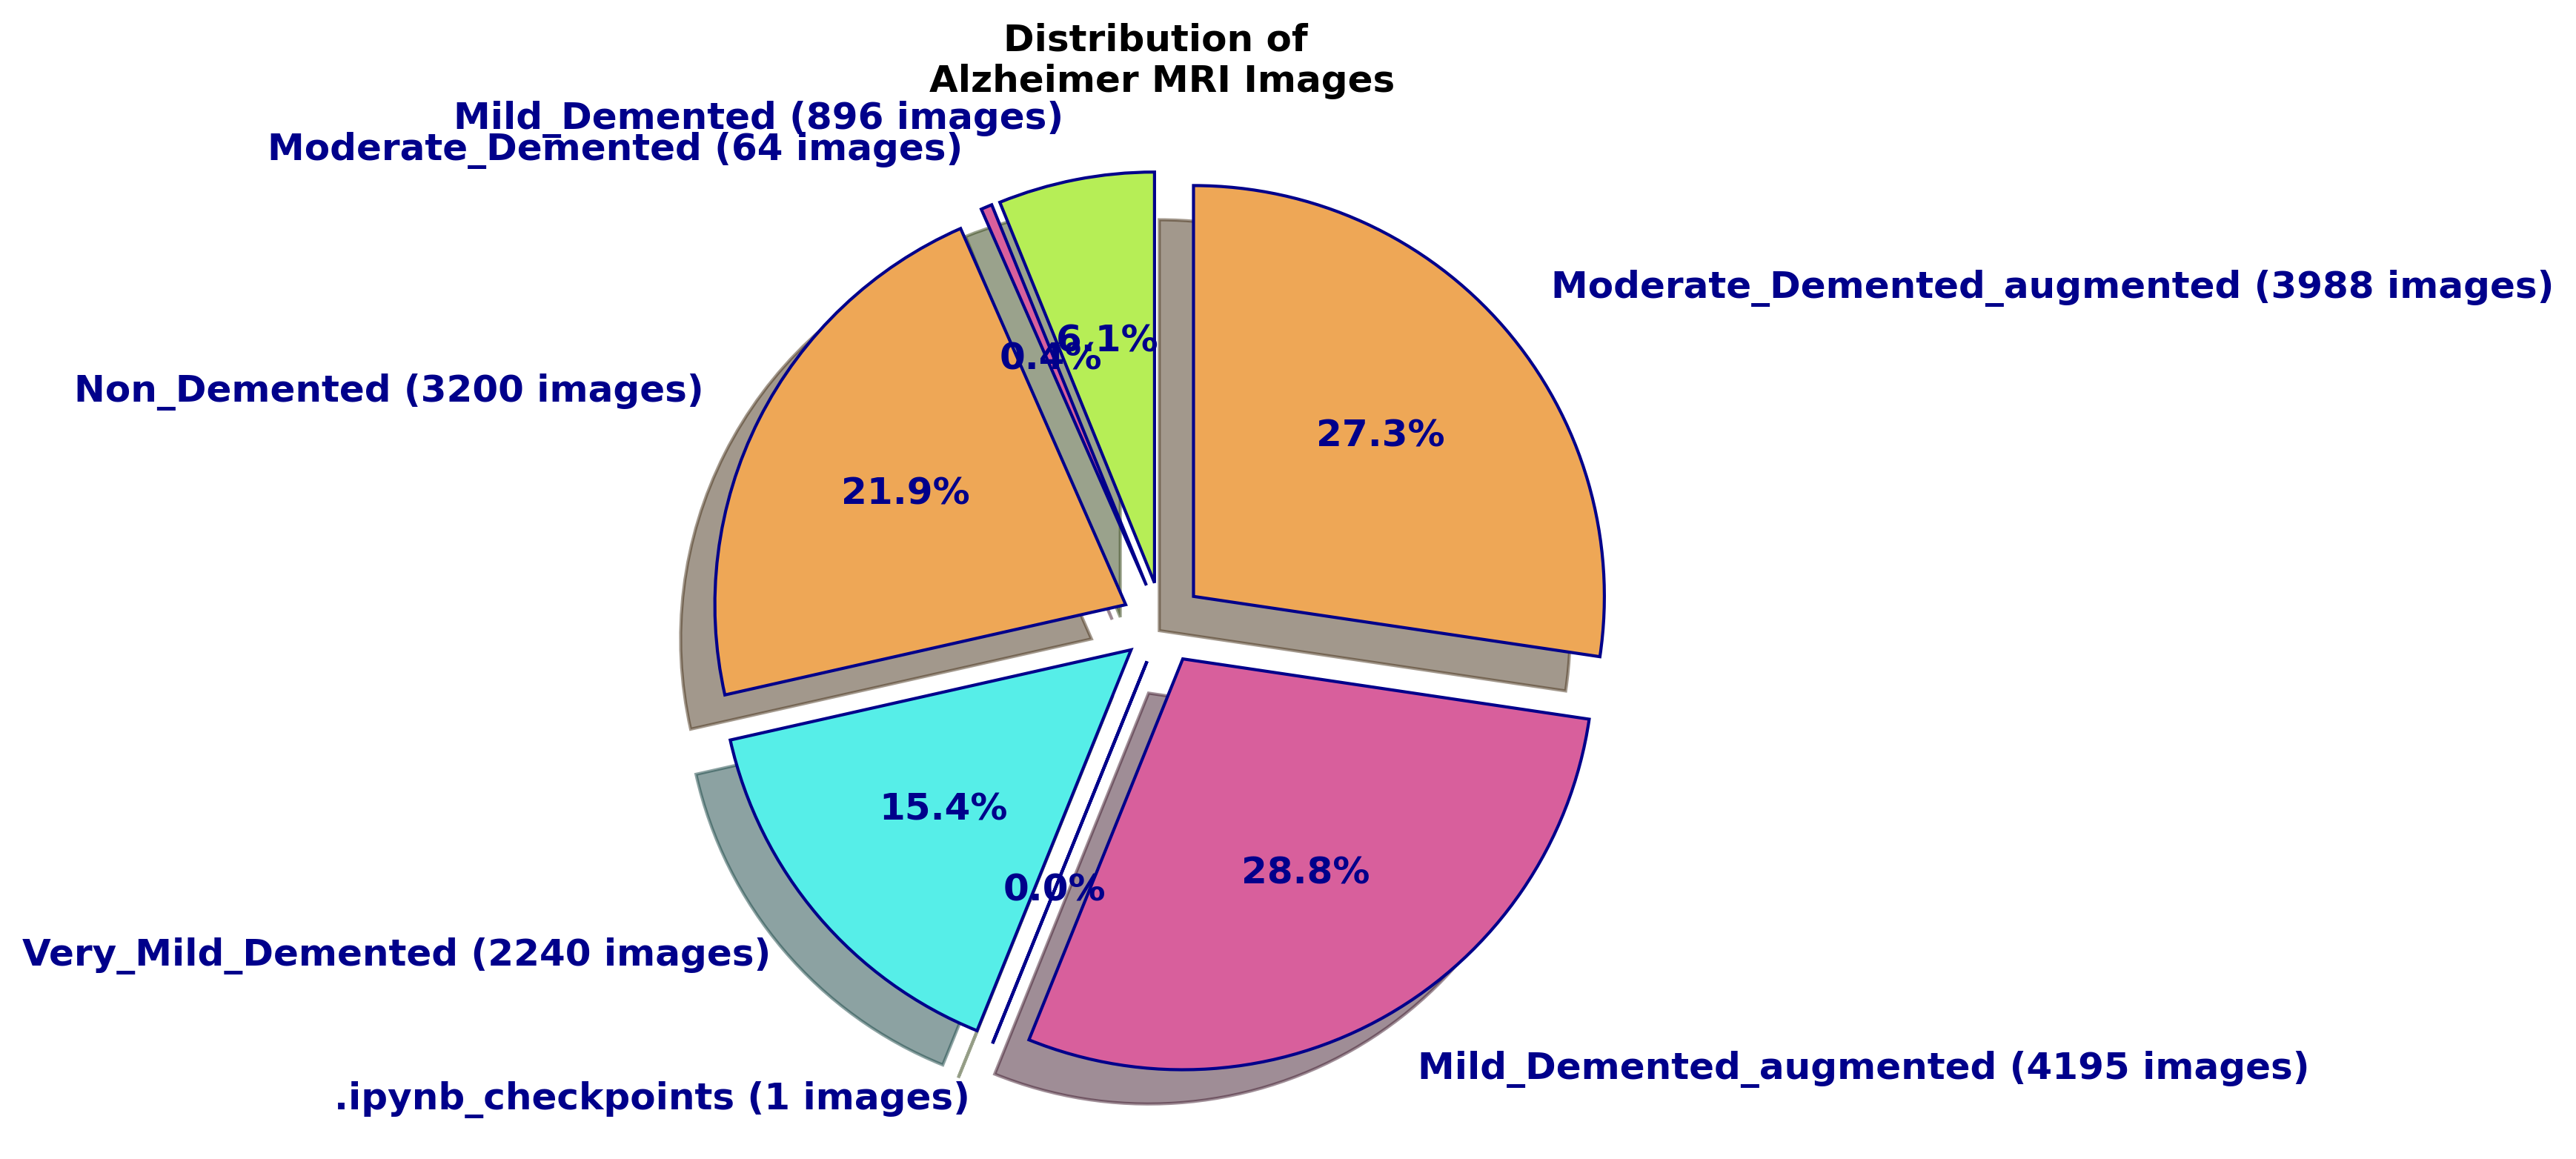

In [29]:
image_counter(output_data_dir)